<a href="https://colab.research.google.com/github/BenBowring/EnergyData/blob/main/DataInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
!pip install -U -q PyDrive

In [186]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [187]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [188]:
transacts = drive.CreateFile({'id': '1MPuNhnaCwBdQa4E941TiWvBLX9z74QxN'})
transacts.GetContentFile('transact_data.csv')

In [189]:
mapped_installs = drive.CreateFile({'id': '1vtTG0o8Sfa4S1zwsDQZPjsaY1KYnIhp_'})
mapped_installs.GetContentFile('JanCompTrimmed.xlsx')

In [190]:
full_installs = drive.CreateFile({'id': '1H9osyBVtiS7oMKQP1Mo0guM6lSoxC262'})
full_installs.GetContentFile('AccCompliance.xlsx')

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [192]:
transact_df = pd.read_csv('transact_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,17,18,19,21,22,23,24,25,26,27,28,43,44,45,47,48,49,50,51,52,53,54,58,60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [193]:
mapped_df = pd.read_excel('JanCompTrimmed.xlsx')
installs_df = pd.read_excel('AccCompliance.xlsx')

In [237]:
counts = mapped_df.groupby('Company name').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)

kept_cols = ['Installation ID', 'Installation name', 'Country code',
               'Permit identifier', 'Activity code', 'Nace code', 'Installation city',
               'Account  holder name', 'Company activity', 'TS status',
               'Installation address 1', 'Installation ZIP',
               'Installation city.1']

dropped_cols = [x for x in mapped_df.columns if x not in kept_cols]

name_cols = ['Name 1', 'Name 2', 'Name 3']


In [236]:
counts[counts['ICIS-ID'] == 5]

,ICIS-ID,paid_in,paid_out
Company name,,,
Rekeep s.p.a.,5,NaN,NaN
Dairy crest,5,NaN,NaN
Mazarron,5,NaN,NaN
EUROCHEM,5,NaN,NaN
Galbani,5,NaN,NaN
...,...,...,...
V.E.A.K. S.A.,5,NaN,NaN
Enegi Fyns,5,NaN,NaN
Enea S.A.,5,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


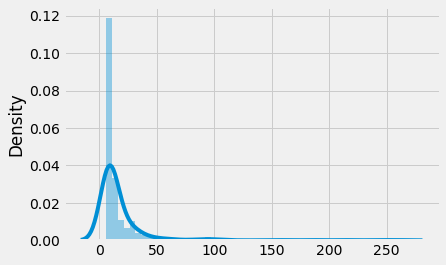

In [196]:
sns.distplot(counts[counts['ICIS-ID'] > 5])

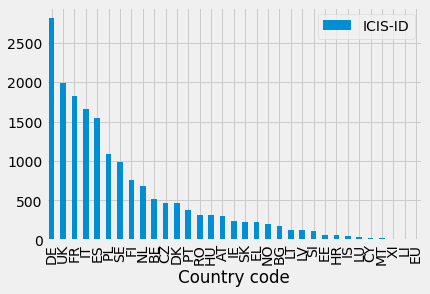

In [197]:
country_dist = mapped_df.groupby('Country code').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
country_dist.plot(kind = 'bar')

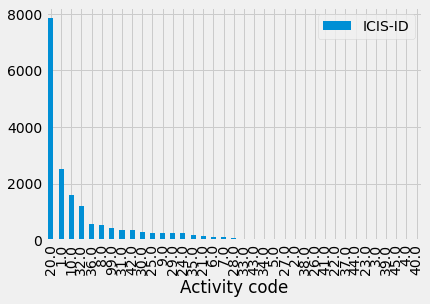

In [198]:
activity_dist = mapped_df.groupby('Activity code').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
activity_dist.plot(kind = 'bar')

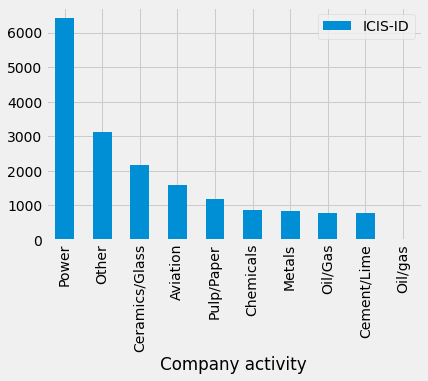

In [199]:
alt_activity_dist = mapped_df.groupby('Company activity').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
alt_activity_dist.plot(kind = 'bar')

In [200]:
transact_df[transact_df['TRANSFERRING_ACCOUNT_HOLDER'] == 'Vetropack Austria GmbH'].head(1)

,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_STATUS,TRANSFERRING_REGISTRY_NAME,TRANSFERRING_ACCOUNT_TYPE,TRANSFERRING_ACCOUNT_TYPE2,TRANSFERRING_ACCOUNT_OPEN_DT,TRANSFERRING_ACCOUNT_END_OF_VALIDITY,TRANSFERRING_ACCOUNT_NAME,...,ACQUIRING_INSTALLATION_MAIN_ACTIVITY,ORIGINATING_REGISTRY,UNIT_TYPE_DESCRIPTION,SUPP_UNIT_TYPE_DESCRIPTION,ORIGINAL_PERIOD_CODE,LULUCF_CODE_DESCRIPTION,PROJECT_IDENTIFIER,TRACK,EXPIRY_DATE,AMOUNT
36908,EU380300,10-2,2017-03-20 15:29:13,Completed,Austria,100.0,100-Holding Account,2005-06-16 00:00:00,NaN,Vetropack Pöchlarn,...,-,EU,Non-Kyoto Unit,EU General Allowances (EUA),2,NaN,NaN,NaN,NaN,52607


In [201]:
len(mapped_df['Installation name'].unique())

17188

In [202]:
mapped_string = mapped_df['Installation name'].unique()
transact_string = transact_df['TRANSFERRING_ACCOUNT_NAME']
contained_names = [install for install in mapped_string if install in transact_string]

In [203]:
ids_out = transact_df.groupby('TRANSFERRING_ACCOUNT_NAME').agg({'AMOUNT': ['sum']})
ids_in = transact_df.groupby('ACQUIRING_ACCOUNT_NAME').agg({'AMOUNT': ['sum']})

In [204]:
amount_out = ids_out.loc[[install for install in mapped_string if install in ids_out.index]]
amount_in = ids_in.loc[[install for install in mapped_string if install in ids_in.index]]

In [205]:
mapped_df['PAID_OUT'] = amount_out
mapped_df['PAID_IN'] = amount_in

In [206]:
installs_df.columns

Index(['REGISTRY_CODE', 'INSTALLATION_NAME', 'INSTALLATION_IDENTIFIER',
       'PERMIT_IDENTIFIER', 'MAIN_ACTIVITY_TYPE_CODE', 'COMPLIANCE_CODE',
       'CH_COMPLIANCE_CODE', 'COMPLIANCE_STATUS_LATEST_YEAR',
       'TOTAL_VERIFIED_EMISSIONS', 'CH_TOTAL_VERIFIED_EMISSIONS',
       'TOTAL_SURRENDERED_ALLOWANCES', 'YEAR_OF_FIRST_EMISSIONS',
       'YEAR_OF_LAST_EMISSIONS', 'ACCOUNT_CLOSURE'],
      dtype='object')

In [207]:
mapped_df.columns

Index(['ICIS-ID', 'Installation ID', 'Installation name', 'Country code',
       'Permit identifier', 'Activity code', 'Nace code', 'Installation city',
       'Account  holder name', 'Company name', 'Company activity', 'TS status',
       'Installation address 1', 'Installation address 2', 'Installation ZIP',
       'Installation city.1', 'Country', 'Country origin', 'Contact info name',
       'Contact info Email', 'Contact address 1', 'Contact address 2',
       'Contact ZIP code', 'Contact city', 'Contact country', 'Name 1',
       'Email 1', 'Phone 1', 'Name 2', 'Email 2', 'Phone 2', 'Name 3',
       'Email 3', 'Phone 3', 'EUTL Link', 'Comments', 'PAID_OUT', 'PAID_IN'],
      dtype='object')

In [208]:
installs_index = installs_df.groupby('INSTALLATION_NAME')['INSTALLATION_IDENTIFIER'].count().index
mapped_index = mapped_df.groupby('Installation name')['ICIS-ID'].count().index

In [209]:
len([install for install in installs_index if install in mapped_index])

12637

Getting a simple df with count and money

In [229]:
count_df = mapped_df[['Installation name', 'ICIS-ID']].copy()
count_df.set_index('Installation name', inplace = True)

In [230]:
count_df['AmountIn'] = amount_in
count_df['AmountOut'] = amount_out
count_df['Diff'] = (amount_in - amount_out) / (amount_in + amount_out)

In [234]:
count_df.sort_values(by = 'Diff', ascending = True).head()

,ICIS-ID,AmountIn,AmountOut,Diff
Installation name,,,,
Wienerberger B.V. Steenfabriek Doorwerth,NL-264,4.0,69091.0,-0.999884
Ibstock Brick Ltd Stourbridge Factory,UK-833,78.0,91912.0,-0.998304
Långe Jan,SE-28,51.0,38366.0,-0.997345
"Lans Westland BV, Locatie Lans Herenwerf",NL-217,110.0,74792.0,-0.997063
"Scania, Södertälje",SE-385,115.0,54295.0,-0.995773


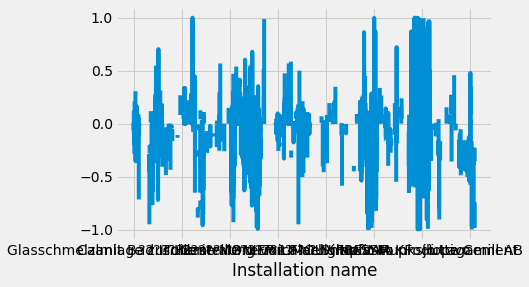

In [235]:
count_df['Diff'].plot()